# Using Machine Learning Algorithm to Predict Diagnosis of a Breast Tumor 
  
  
## Problem statement
Breast cancer is the most common malignancy among women, which occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

Machine Learning model is build using the dataset provided which gives the binary classification results as mentioned below.
* 1 = Malignant (Cancerous) - Present
* 0 = Benign (Not Cancerous) -Absent

Importing the Necessary Libraries



1.   **Numpy** - For data processing the calculation. Numpy array makes the data to be processed easily and built in modules gives the user to build models easier.
2.   **Panadas** - Pandas datastructure Dataframe makes the data handling easier and data pre processing in effective manner.



In [3]:
#importing the necessary libraries for data prepocessing
import numpy as np
import pandas as pd

Importing the data set using pandas "***read_csv***" function which reads the csv file and return a dataframe.

In [4]:
# Reading the data using the Pandas "read_csv" function
breast_cancer_data = pd.read_csv('data.csv', index_col=False)

#### Load Dataset

First, load the supplied CSV file using additional options in the Pandas read_csv function. 

#### Inspecting the data
The first step is to visually inspect the new data set. There are multiple ways to achieve this:
* The easiest being to request the first few records using the DataFrame data.head()* method. By default, “data.head()” returns the first 5 rows from the DataFrame object df (excluding the header row). 
* Alternatively, one can also use “df.tail()” to return the five rows of the data frame. 
* For both head and  tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.Inspecting the data

In [5]:
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Here, Data contains 32 features out of which "***diagnosis***" is the value of classification "***Malignant (Cancerous)***" or "***Benign (Not Cancerous)***" which is the target feature.


In [6]:
print("Number of Fearures", len(breast_cancer_data.columns))
print(*breast_cancer_data.columns, sep = "\n")

Number of Fearures 32
id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


Feature "***id***" feature is a unique id to the patient which serves no purpose to the model, hence we should always drop such features with all unique values which may overfit the model.

In [7]:
breast_cancer_data.drop('id', axis =1, inplace=True)
breast_cancer_data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [8]:
# Review data types.
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
breast_cancer_data.shape

(569, 31)

In [10]:
#check for missing variables
breast_cancer_data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [11]:
breast_cancer_data.diagnosis.unique()

array(['M', 'B'], dtype=object)

Data analysis using the pandas gave us the following information for the machine learning model.




*   Data Shap - After dorping the unique id fiels the data set contains the 569 entries with each entries having 30 features and 1 target variable.
*   Datatype - The data type of the features are all integer and float type which makes the machine learning model without any any preprocessing.

*   Diaganoris - The diagonisis coloumn contains object "M" and "B" which should be encoded for the model building.



*   Dataset is free from Null values and all entires contains a value for the feature.







In [12]:
breast_cancer_data.diagnosis.unique()

array(['M', 'B'], dtype=object)

# Breast Cancer Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, We are getting familiar with the data, which will provide useful knowledge for data pre-processing.

1. ***Descriptive statistics*** is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation. 
	
2. ***Visualization*** is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results. 

#**Descriptive statistics**
Summary statistics are measurements meant to describe data.


The statistic and other calculation are done using the pandas "***describe()***" method, and **Matplotlib**, **seaborn** libraries are used to visualize the data. So the necessary libraries are imported.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import norm
import seaborn as sns # visualization
plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [14]:
#basic descriptive statistics
breast_cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
breast_cancer_data.skew(numeric_only=True)

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

 >The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.
 From the graphs, we can see that **radius_mean**, **perimeter_mean**, **area_mean**, **concavity_mean** and **concave_points_mean** are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

In [16]:
# Group by diagnosis and review the output.
diag_gr = breast_cancer_data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


Check binary encoding from NB1 to confirm the coversion of the diagnosis categorical data into numeric, where
* Malignant = 1 (indicates prescence of cancer cells)
* Benign = 0 (indicates abscence)

##### **Observation**
> *357 observations indicating the absence of cancer cells and 212 show absence of cancer cell*

#**Data Visualizations**

One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

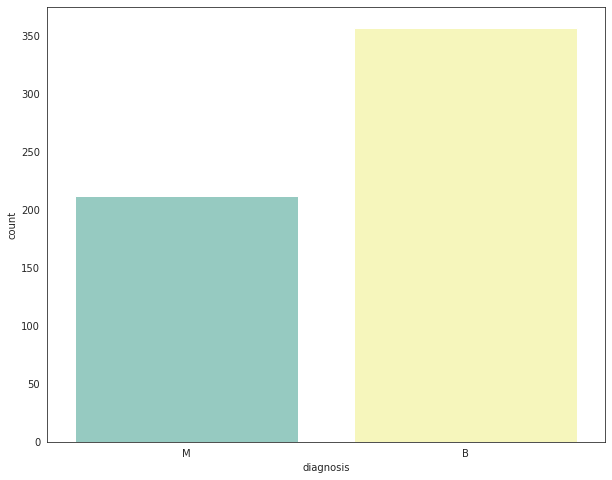

In [17]:
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(x=breast_cancer_data['diagnosis'],label='Count',palette="Set3")

Above graph visualization shows the same value from the groupby function values.

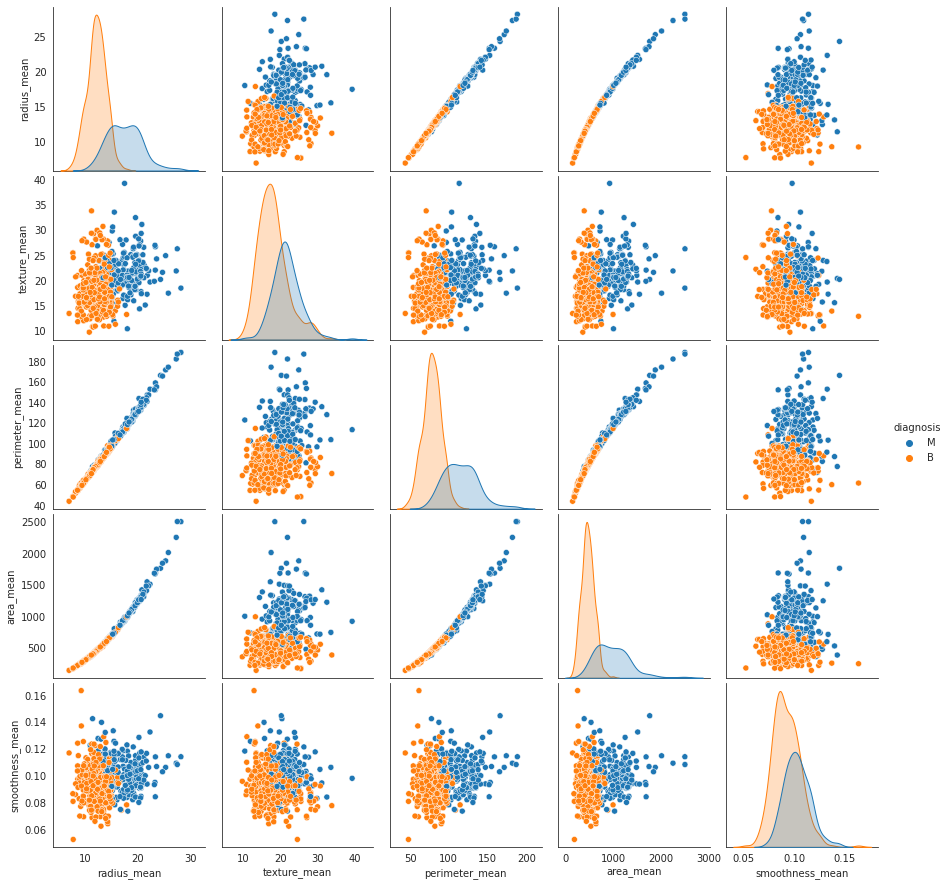

In [18]:
sns.pairplot(breast_cancer_data, hue = 'diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean'])

Pair plot shows us the correlation between the Diagonisis and the individual features '**radius_mean**', '**texture_mean**', '**perimeter_mean**', '**area_mean**','**smoothness_mean**' which are selected based on the Skewness values from the previous data exploration values.

##Visualise distribution of data via histograms
Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).
Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.



> The Data are broken into different catagories namely "**_mean**", "**_se**" and "**_worst**" based on the feature naming for the ease of histogram visualization.



In [19]:
breast_cancer_mean = breast_cancer_data.iloc[:,1:11]
breast_cancer_se = breast_cancer_data.iloc[:,11:22]
breast_cancer_worst = breast_cancer_data.iloc[:,23:]

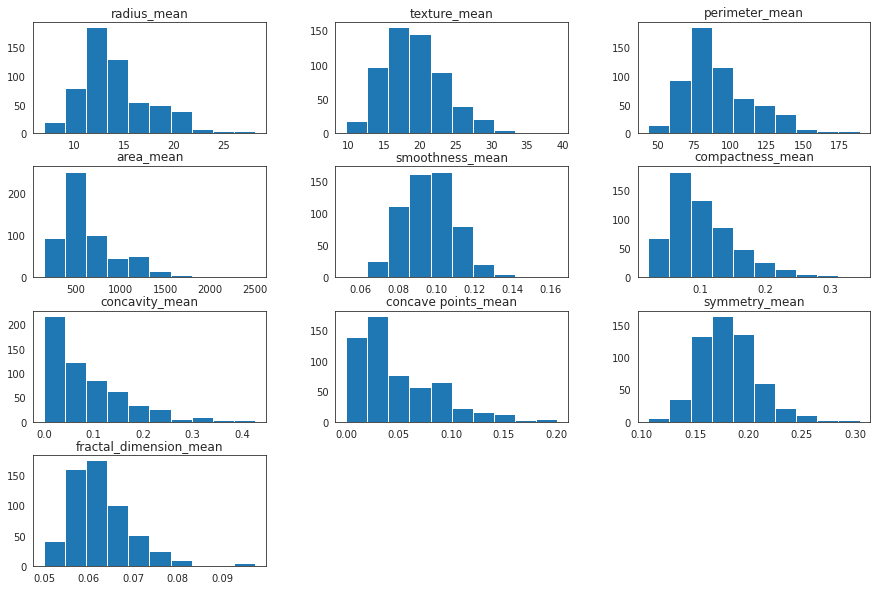

In [20]:
histogram_mean = breast_cancer_mean.hist(bins=10, figsize=(15, 10),grid=False)

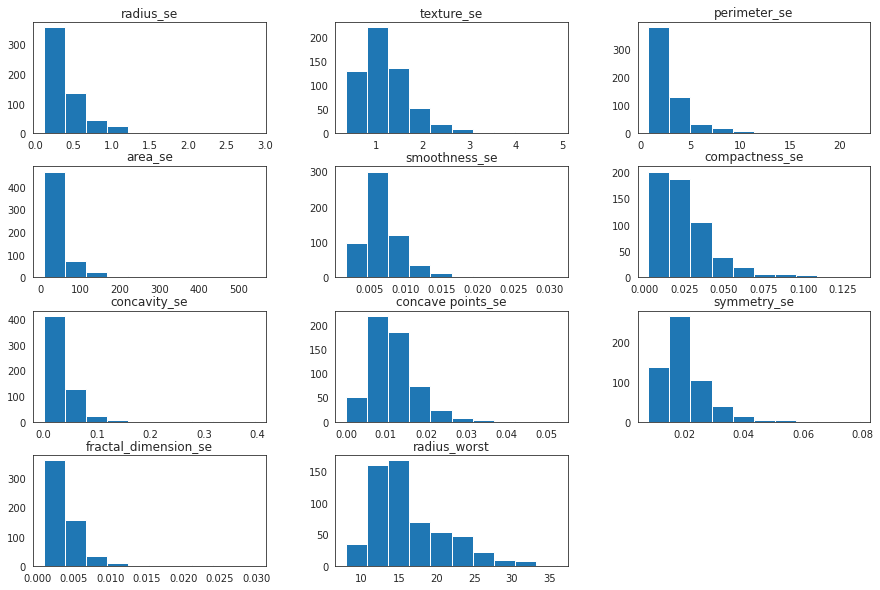

In [21]:
histogram_se = breast_cancer_se.hist(bins=10, figsize=(15, 10),grid=False)

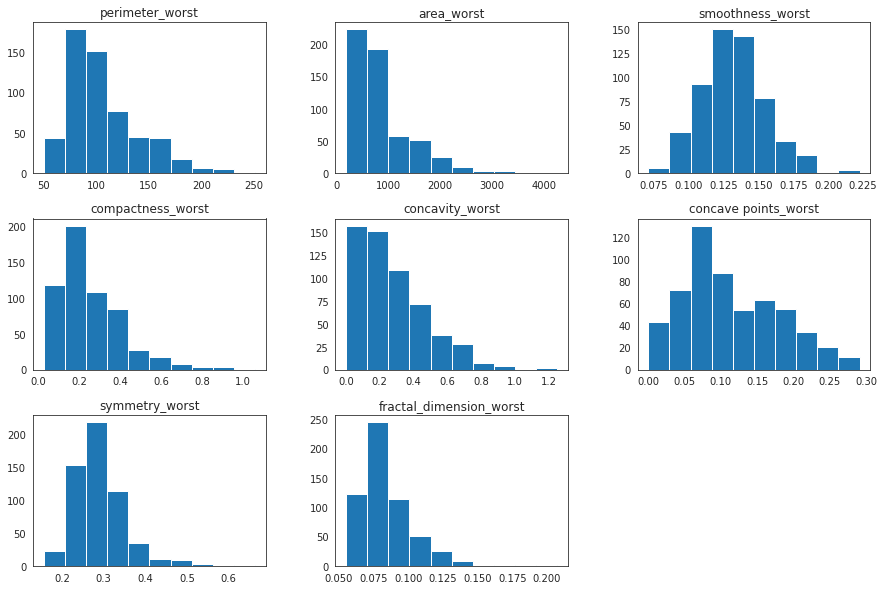

In [22]:
histogran_worst = breast_cancer_worst.hist(bins=10, figsize=(15, 10),grid=False)

##Visualizing distribution of data via density plots



> The Data are broken into different catagories namely "**_mean**", "**_se**" and "**_worst**" as on histogram visualization.



### Density plots "_mean" suffix designition

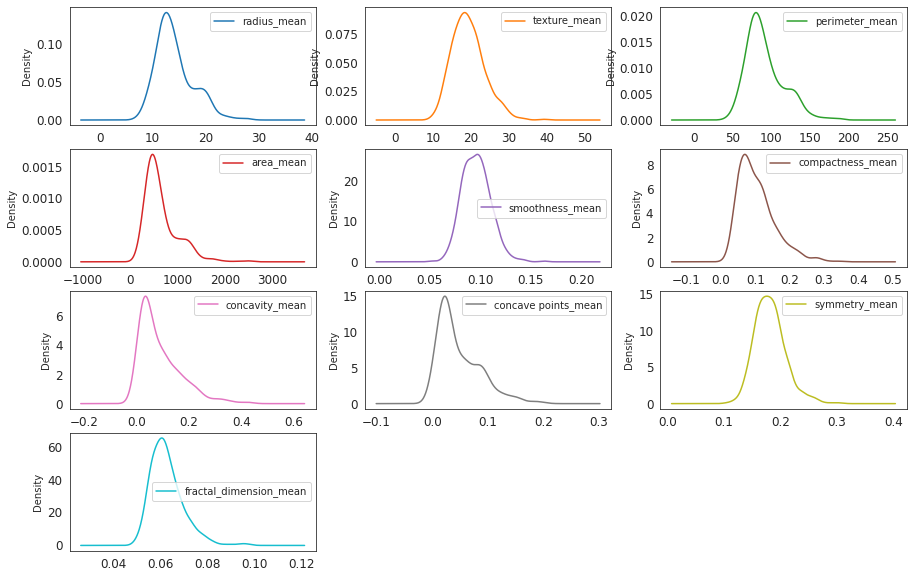

In [23]:
#Density Plots
plots = breast_cancer_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=12, figsize=(15,10))

### Density plots "_se" suffix designition

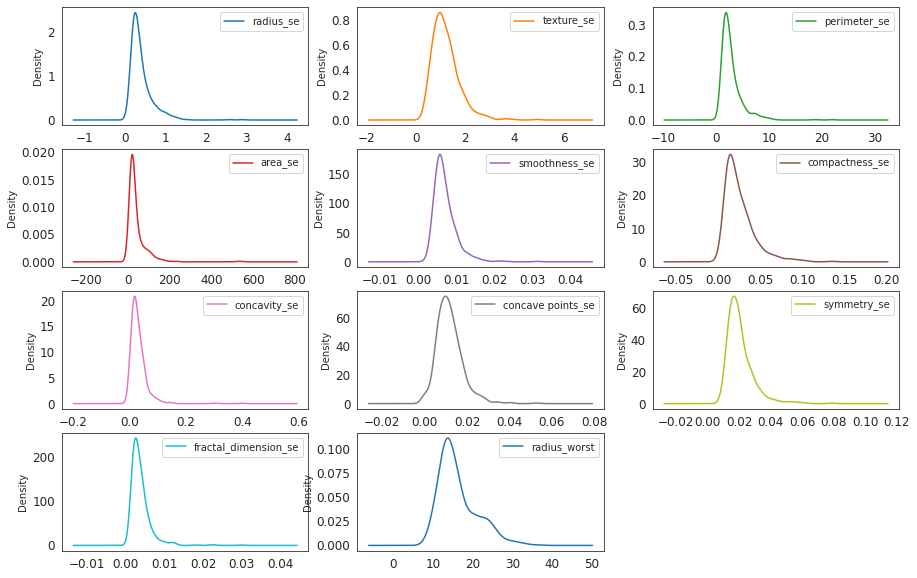

In [24]:
#Density Plots
plots = breast_cancer_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=12, figsize=(15,10))

### Density plot "_worst" suffix designition



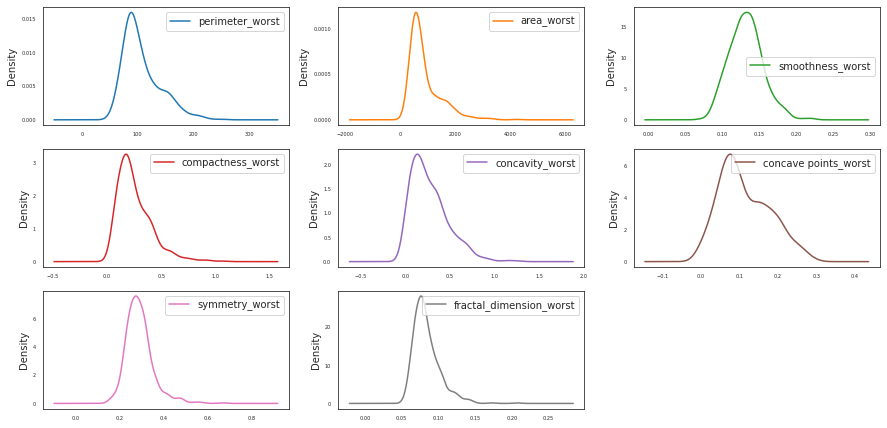

In [25]:
#Density Plots
plots = breast_cancer_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, figsize=(15,10))

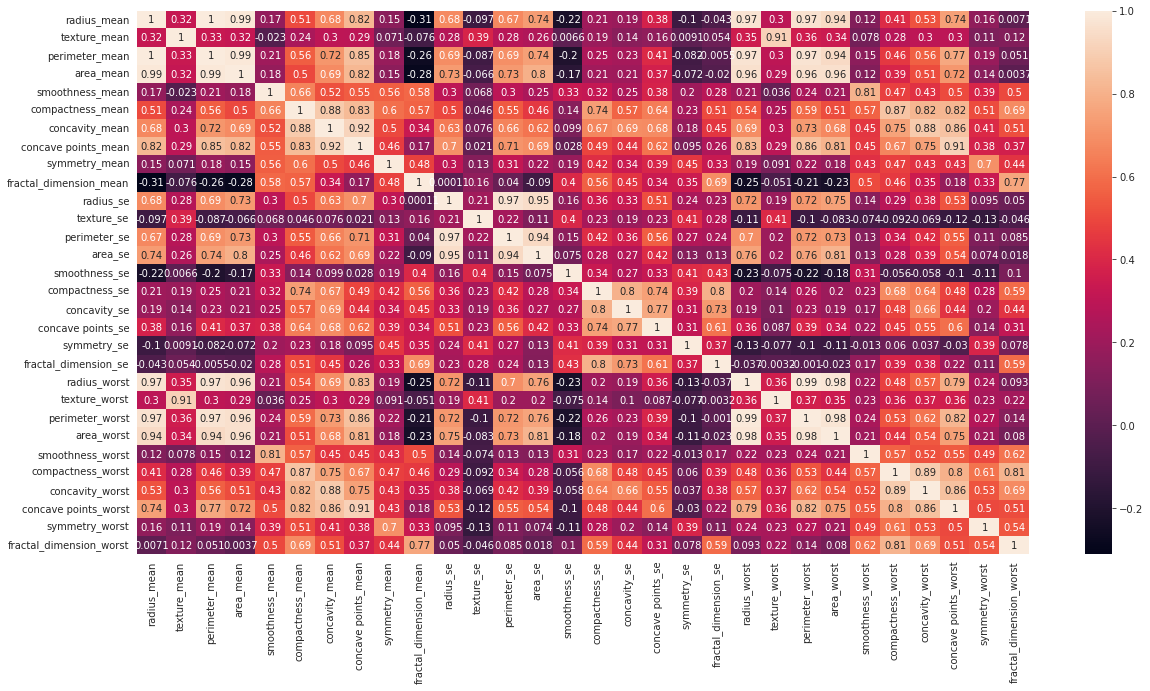

In [26]:
#here we made a heatmap figure of correlation of all the columns
plt.figure(figsize =(20,10))
sns.heatmap(breast_cancer_data.corr(), annot =True)

### Summary

* Mean values of cell radius, perimeter, area, compactness, concavity
    and concave points can be used in classification of the cancer. Larger
    values of these parameters tends to show a correlation with malignant
    tumors.
* Mean values of texture, smoothness, symmetry or fractual dimension
    does not show a particular preference of one diagnosis over the other. 
    
* In any of the histograms there are no noticeable large outliers that warrants further cleanup.

##Pre-Processing the data

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



1.   **LabelEncoder** - Used to enocode the string data in this case we encode the diagonis column to Integer data type.
2.   **train_test_split** - Used to split the data for training and testing the model.
3.   **StandardScaler** - Used to scale the data with common range.
4.   **PCA** - Used in the Principal component analysis.




#### Label encoding

In [28]:
array = breast_cancer_data.values
X = array[:,1:31] #feature column
y = array[:,0] # diagnisis column

In [29]:
#Encoding the string object into integer
le = LabelEncoder()
y = le.fit_transform(y)

> *After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively*, illustrated by calling the transform method of LabelEncorder on two dummy variables.**


####Spliting the data into training and test sets

In [30]:
##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

#### Feature Standardization

In [31]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

#### Feature decomposition using Principal Component Analysis(  PCA)

In [32]:
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

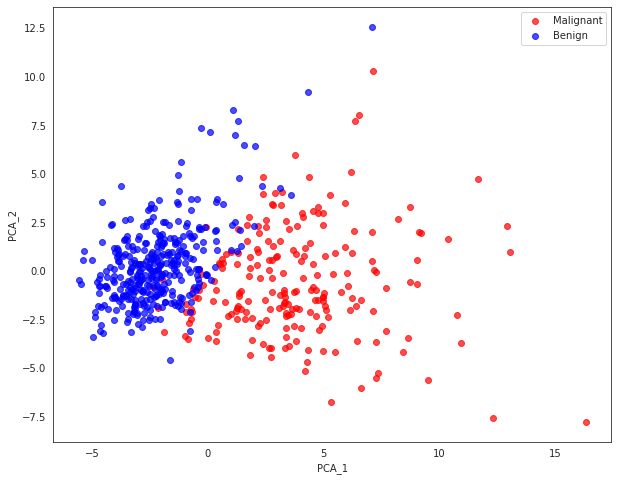

In [33]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][breast_cancer_data.diagnosis == 'M'],PCA_df['PCA_2'][breast_cancer_data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][breast_cancer_data.diagnosis == 'B'],PCA_df['PCA_2'][breast_cancer_data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are “most spread” along the new feature axes.



In [34]:
var= pca.explained_variance_ratio_

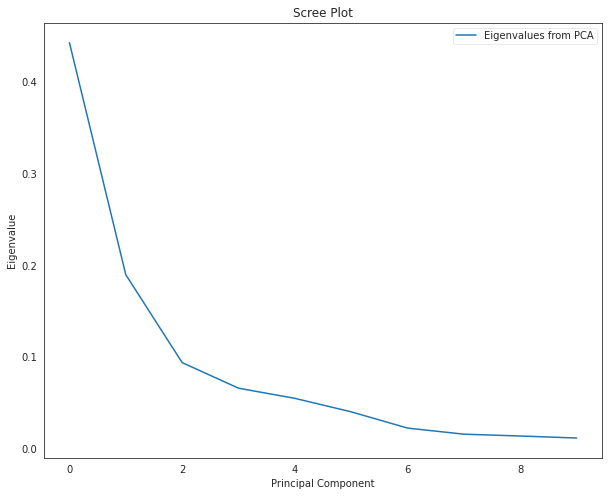

In [35]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()

> #### Observation
The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

In [36]:
from scipy.stats import norm

# *SPLITTING THE DATASET*

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [38]:
X_train

array([[11.2, 29.37, 70.67, ..., 0.0, 0.1566, 0.05905],
       [15.78, 22.91, 105.7, ..., 0.2034, 0.3274, 0.1252],
       [12.22, 20.04, 79.47, ..., 0.08088, 0.2709, 0.08839],
       ...,
       [11.69, 24.44, 76.37, ..., 0.1308, 0.2803, 0.0997],
       [13.77, 22.29, 90.63, ..., 0.1673, 0.308, 0.09333],
       [8.671, 14.45, 54.42, ..., 0.0, 0.2592, 0.07848]], dtype=object)

In [39]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [40]:
X_test

array([[11.66, 17.07, 73.7, ..., 0.04262, 0.2731, 0.06825],
       [15.53, 33.56, 103.7, ..., 0.2014, 0.3512, 0.1204],
       [11.93, 21.53, 76.53, ..., 0.07247, 0.2438, 0.08541],
       ...,
       [12.85, 21.37, 82.63, ..., 0.05601, 0.2488, 0.08151],
       [14.58, 13.66, 94.29, ..., 0.09186, 0.2626, 0.07048],
       [17.99, 20.66, 117.8, ..., 0.1974, 0.306, 0.08503]], dtype=object)

In [41]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

# Model Training


Importing the necessary libraries for the model evaluation and testing.

In [42]:
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix

# 1:*Using KNeighborsClassifier Method*

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_predict =knn_model.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [46]:
cm = confusion_matrix(y_test,y_predict)

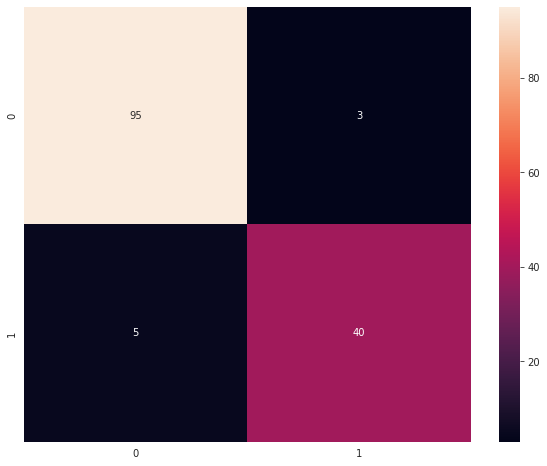

In [47]:
sns.heatmap(cm ,annot=True)

In [48]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_model.predict(X_test)))

Train set Accuracy:  0.9483568075117371
Test set Accuracy:  0.9440559440559441


In [49]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.93      0.89      0.91        45

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### KNNeighbour accuracy of 94% has been achieved 

# 2:*Using SVM Method*

In [50]:
from sklearn.svm import SVC

In [51]:
svm_model = SVC(kernel = 'linear', random_state = 0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [52]:
y_predict =svm_model.predict(X_test)

In [53]:
y_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [54]:
cm = confusion_matrix(y_test,y_predict)

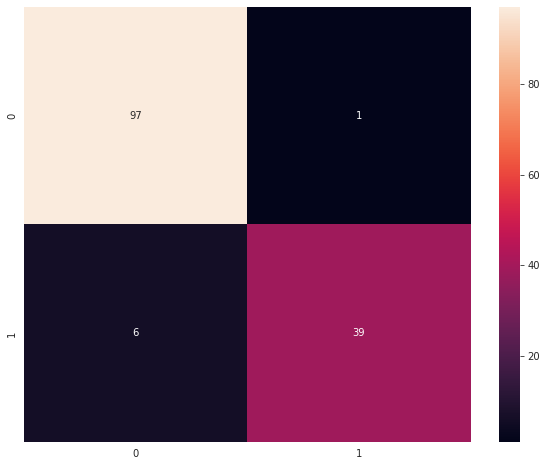

In [55]:
sns.heatmap(cm ,annot=True)

In [56]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, svm_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, svm_model.predict(X_test)))

Train set Accuracy:  0.9694835680751174
Test set Accuracy:  0.951048951048951


In [57]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        98
           1       0.97      0.87      0.92        45

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



### SVM Accuracy of 95% has been achieved 

# 3:*Using Decesion Tree Method*

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
# scaler from StandardScaler
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [60]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train_scaler,y_train)

#Predict the response for test dataset
y_pred_Df = clf.predict(X_test_scaler)


In [61]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train_scaler)))
print("Test set Accuracy:",metrics.accuracy_score(y_test, y_pred_Df))
print(classification_report(y_test,y_pred_Df))

Train set Accuracy:  0.9624413145539906
Test set Accuracy: 0.951048951048951
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.95      0.89      0.92        45

    accuracy                           0.95       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



### Decesion Tree accuracy of 95% has been achieved 